In [1]:
from pathlib import Path

import polars as pl

from e2e_taxi_ride_duration_prediction.ingestion import get_nyc_taxi_data

pl.Config.set_engine_affinity("streaming")

if Path().resolve().name == "notebooks":
    PROJECT_ROOT = Path("../").resolve()
else:
    PROJECT_ROOT = Path().resolve()

In [2]:
start = (2019, 11)
end = (2020, 3)
lf = get_nyc_taxi_data(root=PROJECT_ROOT, start=start, end=end)

2025-07-26 09:22:00.904 | INFO     | e2e_taxi_ride_duration_prediction.ingestion:get_nyc_taxi_data:119 - Found existing parquet file for NYC Taxi data from 2019-11 to 2020-3. Loading it.


In [3]:
# Create target from pickup and dropoff datetimes
lf = lf.with_columns(
    (
        (
            pl.col("tpep_dropoff_datetime") - pl.col("tpep_pickup_datetime")
        ).dt.total_seconds()
        / 60
    ).alias("duration")
)

In [4]:
raw_describe = lf.describe()
raw_describe

statistic,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",2.948649e7,"""29486490""","""29486490""",2.9235898e7,2.948649e7,2.9235898e7,"""29235898""",2.948649e7,2.948649e7,2.948649e7,2.948649e7,2.948649e7,2.948649e7,2.948649e7,2.948649e7,2.948649e7,2.948649e7,2.9235896e7,0.0,2.948649e7
"""null_count""",0.0,"""0""","""0""",250592.0,0.0,250592.0,"""250592""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250594.0,2.948649e7,0.0
"""mean""",1.669492,"""2020-01-06 11:47:11.605617""","""2020-01-06 12:04:19.053268""",1.522659,2.944897,1.059622,null,164.152709,162.045534,1.266029,13.042819,1.124695,0.509532,2.218243,0.355108,0.297975,19.068458,2.296846,null,17.124128
"""std""",0.470825,null,null,1.158539,79.338525,0.824985,null,65.83455,70.090756,0.489884,144.246253,92.087078,92.078579,2.780891,1.729232,0.033955,234.075919,0.705191,null,66.485566
"""min""",1.0,"""2003-01-01 00:00:00""","""2003-01-01 00:01:44""",0.0,-37264.53,1.0,"""N""",1.0,1.0,0.0,-1472.0,-27.0,-0.5,-493.22,-40.5,-0.3,-1472.8,-2.5,null,-47462.616667
"""25%""",1.0,"""2019-12-03 13:45:44""","""2019-12-03 14:04:34""",1.0,0.96,1.0,null,125.0,113.0,1.0,6.5,0.0,0.5,0.0,0.0,0.3,11.3,2.5,null,6.616667
"""50%""",2.0,"""2020-01-06 16:18:13""","""2020-01-06 16:34:40""",1.0,1.6,1.0,null,162.0,162.0,1.0,9.5,0.5,0.5,1.95,0.0,0.3,14.75,2.5,null,11.066667
"""75%""",2.0,"""2020-02-09 22:12:59""","""2020-02-09 22:29:53""",2.0,2.98,1.0,null,233.0,234.0,2.0,14.5,2.5,0.5,2.95,0.0,0.3,20.47,2.5,null,18.05
"""max""",6.0,"""2090-12-31 06:41:26""","""2090-12-31 07:18:49""",9.0,269803.73,99.0,"""Y""",265.0,265.0,5.0,671100.14,500000.8,500000.5,1100.0,925.5,0.3,1000003.8,3.0,null,8525.116667


## Basic Cleaning

In [5]:
# some earlier versions of the dataset named the airport fee column as "Airport_fee" instead of "airport_fee"
if "Airport_fee" in lf.collect_schema().names():
    lf = lf.with_columns(
        pl.coalesce(pl.col("Airport_fee"), pl.col("airport_fee")).alias("airport_fee")
    ).drop("airport_fee")

# drop airport_fee if it is not present in the dataset
if lf.select("airport_fee").count().collect(engine="streaming")[0, 0] == 0:
    lf = lf.drop("airport_fee")

In [6]:
# Filter rows with negative values, drop null values and duplicates
lf = (
    lf.filter(
        (pl.col("trip_distance") >= 0)
        & (pl.col("fare_amount") >= 0)
        & (pl.col("extra") >= 0)
        & (pl.col("mta_tax") >= 0)
        & (pl.col("tip_amount") >= 0)
        & (pl.col("tolls_amount") >= 0)
        & (pl.col("improvement_surcharge") >= 0)
        & (pl.col("total_amount") >= 0)
        & (pl.col("congestion_surcharge") >= 0)
        & (pl.col("duration") >= 0)
    )
    .drop_nulls()
    .unique()
)

In [7]:
# Filter time range
filter_end_month = 1 if end[1] == 12 else end[1] + 1
filter_end_year = end[0] + 1 if filter_end_month == 1 else end[0]
print(
    f"Filtering data from {start[0]}-{start[1]} to {filter_end_year}-{filter_end_month}"
)
lf = lf.filter(
    (
        pl.col("tpep_pickup_datetime")
        <= pl.datetime(filter_end_year, filter_end_month, 1)
    )
    & (pl.col("tpep_pickup_datetime") >= pl.datetime(start[0], start[1], 1))
).sort("tpep_pickup_datetime")

Filtering data from 2019-11 to 2020-4


In [8]:
lf.collect_schema()

Schema([('VendorID', Int64),
        ('tpep_pickup_datetime', Datetime(time_unit='ns', time_zone=None)),
        ('tpep_dropoff_datetime', Datetime(time_unit='ns', time_zone=None)),
        ('passenger_count', Float64),
        ('trip_distance', Float64),
        ('RatecodeID', Float64),
        ('store_and_fwd_flag', String),
        ('PULocationID', Int64),
        ('DOLocationID', Int64),
        ('payment_type', Int64),
        ('fare_amount', Float64),
        ('extra', Float64),
        ('mta_tax', Float64),
        ('tip_amount', Float64),
        ('tolls_amount', Float64),
        ('improvement_surcharge', Float64),
        ('total_amount', Float64),
        ('congestion_surcharge', Float64),
        ('duration', Float64)])

In [9]:
categorical_columns = [
    "VendorID",
    "RatecodeID",
    "PULocationID",
    "DOLocationID",
    "payment_type",
    "store_and_fwd_flag",
]

for col in categorical_columns:
    lf.with_columns(pl.col(col).cast(pl.Utf8).cast(pl.Categorical))

In [10]:
cleaned_describe = lf.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
cleaned_describe

statistic,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",2.9144168e7,"""29144168""","""29144168""",2.9144168e7,2.9144168e7,2.9144168e7,"""29144168""",2.9144168e7,2.9144168e7,2.9144168e7,2.9144168e7,2.9144168e7,2.9144168e7,2.9144168e7,2.9144168e7,2.9144168e7,2.9144168e7,2.9144168e7,2.9144168e7
"""null_count""",0.0,"""0""","""0""",0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.665557,"""2020-01-06 10:51:48.493057""","""2020-01-06 11:08:50.916487""",1.522866,2.873136,1.059274,null,164.402992,162.325988,1.270704,12.965846,1.118255,0.513971,2.243353,0.345117,0.299806,19.029779,2.310103,17.040391
"""std""",0.471795,null,null,1.159,5.170198,0.825282,null,65.705023,69.984604,0.463406,145.063748,92.626125,92.617748,2.783078,1.711732,0.007618,235.42593,0.662327,66.107473
"""min""",1.0,"""2019-11-01 00:00:00""","""2019-11-01 00:00:43""",0.0,0.0,1.0,"""N""",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""50%""",2.0,"""2020-01-06 14:36:43""","""2020-01-06 14:51:21""",1.0,1.6,1.0,null,162.0,162.0,1.0,9.5,0.5,0.5,1.96,0.0,0.3,14.75,2.5,11.033333
"""75%""",2.0,"""2020-02-09 20:31:25""","""2020-02-09 20:48:11""",2.0,2.92,1.0,null,234.0,234.0,2.0,14.5,2.5,0.5,2.96,0.0,0.3,20.3,2.5,17.916667
"""95%""",2.0,"""2020-03-07 23:44:00""","""2020-03-07 23:59:03""",5.0,10.5,1.0,null,249.0,256.0,2.0,37.0,3.5,0.5,6.89,6.12,0.3,49.55,2.5,35.333333


In [11]:
removed_rows = raw_describe[0, 4] - cleaned_describe[0, 4]
print(
    f"{(removed_rows / raw_describe[0, 1]):.2%} of data ({removed_rows:.0f} rows) removed with cleaning"
)

0.31% of data (91730 rows) removed with cleaning


In [12]:
# filter outliers
lf = lf.filter(
    (pl.col("trip_distance") <= 19)
    & (pl.col("fare_amount") <= 52)
    & (pl.col("extra") <= 10)
    & (pl.col("mta_tax") <= 10)
    & (pl.col("tolls_amount") <= 6.12)
    & (pl.col("total_amount") <= 75.3)
    & (pl.col("duration") < 60)
)


# Data Overview
The data is for the Yellow Taxis in New York (most common taxis, can pickup passengers anywhere in new york via street hails in contrast to green taxis). For now the green taxis are excluded, but may be included in future iterations. 

## Data Fields
|Field Name|Description|
|:---|:---|
|`VendorID`| A code indicating the TPEP provider that provided the record.<br>1 = Creative Movile Technologies, LLC<br>2 = Curb Mobility, LLC<br>6 = Myle Technologies Inc<br>7 = Helix|
|`tpep_pickup_datetime`|The date and time when the meter was engaged.|
|`tpep_dropoff_dateteime`|The date and time when the meter was disengaged.|
|`passenger_count`|The number of passengers in the vehicle|
|`trip_distance`|The elapsed trip distance in miles reported by the taximeter.|
|`RatecodeID`|The final rate code in effect at the end of the trip.<br>1 = Standard rate<br>2 = JFK<br>3 = Newark<br>4 = Nassau or Westchester<br>5 = Negotiated fare<br>6 = Group ride<br>99 = Null/unknown|
|`store_and_fwd_flag`|This flag indicates whether the trip record was held in vehicle memory before sending to the vendor,<br> aka “store and forward,” because the vehicle did not have a connection to the server.<br>Y = store and forward trip<br>N = not a store and forward trip|
|`PULocationID`|PULocationID TLC Taxi Zone in which the taximeter was engaged.|
|`DOLocationID`|PULocationID TLC Taxi Zone in which the taximeter was disengaged.|
|`payment_type`|A numeric code signifying how the passenger paid for the trip.<br>0 = Flex Fare trip<br>1 = Credit card<br>2 = Cash<br>3 = No charge<br>4 = Dispute<br>5 = Unknown<br>6 = Voided trip|
|`fare_amount`|The time-and-distance fare calculated by the meter.<br>For additional information on the following columns, see [https://www.nyc.gov/site/tlc/passengers/taxi-fare.page](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page)|
|`extra`|Miscellaneous extras and surcharges.|
|`mta_tax`|Tax that is automatically trigerred based on the metered rate in use.|
|`tip_amount`|Tip amount = This field is automatically populated for credit card tips. Cash tips are not included|
|`tolls_amount`|Total amount of all tolls paid in trip.|
|`improvement_surcharge`|Improvement surcharge assessed trips at the flag drop.<br>The improvement
surcharge began being levied in 2015.|
|`total_amount`|The total amount charged to passengers. Does not include cash tips.|
|`congestion_surcharge`|Total amount collected in trip for NYS congestion surcharge.|
|`airport_fee`|For pick up only at LaGuardia and John F. Kennedy Airports.|
|`cbd_congestion_fee`|Per-trip charge for MTA's Congestion Relief Zone starting Jan. 5, 2025|
|`duration` | duration of a ride (turning on taximeter to turning off taximeter) in minutes |

> Source: [https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

In [13]:
# Split into train/test/ future sets
train_end = pl.datetime(2019, 12, 1)
test_end = pl.datetime(2020, 1, 1)
lf_train = lf.filter(pl.col("tpep_pickup_datetime") < train_end)
lf_test = lf.filter(
    (pl.col("tpep_pickup_datetime") >= train_end)
    & (pl.col("tpep_pickup_datetime") < test_end)
)
lf_future = lf.filter(pl.col("tpep_pickup_datetime") >= test_end)

In [14]:
lf_train.describe(
    percentiles=[0.01, 0.25, 0.5, 0.75, 0.99],
)

statistic,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",6.619428e6,"""6619428""","""6619428""",6.619428e6,6.619428e6,6.619428e6,"""6619428""",6.619428e6,6.619428e6,6.619428e6,6.619428e6,6.619428e6,6.619428e6,6.619428e6,6.619428e6,6.619428e6,6.619428e6,6.619428e6,6.619428e6
"""null_count""",0.0,"""0""","""0""",0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.657105,"""2019-11-15 12:38:33.678490""","""2019-11-15 12:52:26.068763""",1.54058,2.560203,1.026958,null,164.661611,162.706402,1.277796,12.111221,1.102221,0.499066,2.08812,0.23823,0.299858,17.878784,2.33445,13.873171
"""std""",0.474677,null,null,1.176533,2.911532,0.721971,null,65.93971,69.481926,0.466919,8.811269,1.229552,0.021838,2.196235,1.180991,0.006522,10.837011,0.621662,9.697962
"""min""",1.0,"""2019-11-01 00:00:00""","""2019-11-01 00:00:43""",0.0,0.0,1.0,"""N""",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""25%""",1.0,"""2019-11-08 07:47:28""","""2019-11-08 07:59:29""",1.0,0.96,1.0,null,125.0,113.0,1.0,6.5,0.0,0.5,0.0,0.0,0.3,11.3,2.5,6.866667
"""50%""",2.0,"""2019-11-15 12:44:47""","""2019-11-15 13:00:36""",1.0,1.6,1.0,null,162.0,162.0,1.0,9.5,0.5,0.5,1.96,0.0,0.3,14.76,2.5,11.416667
"""75%""",2.0,"""2019-11-22 13:59:16""","""2019-11-22 14:14:51""",2.0,2.8,1.0,null,234.0,234.0,2.0,14.0,2.5,0.5,2.95,0.0,0.3,20.16,2.5,18.266667


In [15]:
# remove outliers (above 99th percentile)
# lf_train = lf_train.filter(
#     (pl.col("trip_distance") <= 19.1) &
#     (pl.col("fare_amount") <= 52) &
#     (pl.col("extra") <= 3.5) &
#     (pl.col("mta_tax") <= 12.65) &
#     (pl.col("tolls_amount") <= 6.12) &
#     (pl.col("total_amount") <=75.92) &
#     (pl.col("duration") < 62.54)
# )

In [16]:
import polars.selectors as cs
import seaborn as sns

sns.set_theme()

correlation = lf_train.select(cs.numeric()).collect(engine="streaming").corr()

In [17]:
correlation

VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,0.185929,0.025241,0.003714,-0.007999,-0.004207,-0.021909,0.012081,-0.897593,0.011853,0.021443,0.009052,-0.00482,0.015994,0.006169,-0.000698
0.185929,1.0,0.011092,-0.003893,-0.004915,-0.00325,0.012205,0.007092,-0.162207,0.007952,-0.00225,0.00522,0.005965,0.007101,0.015796,0.009289
0.025241,0.011092,1.0,0.07124,-0.088649,-0.102054,-0.012953,0.913909,-0.039905,0.017882,0.507654,0.583237,0.008608,0.900867,-0.164114,0.73461
0.003714,-0.003893,0.07124,1.0,-0.004872,0.002431,0.014299,0.100579,-0.014798,-0.188985,0.041644,0.069111,-0.111974,0.094548,-0.045708,0.026849
-0.007999,-0.004915,-0.088649,-0.004872,1.0,0.097253,-0.029338,-0.083113,0.024489,0.000693,-0.023522,-0.044209,-0.000165,-0.070349,0.129094,-0.062327
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.009052,0.00522,0.583237,0.069111,-0.044209,-0.032736,-0.028712,0.565895,-0.020606,0.000739,0.404969,1.0,0.002155,0.648736,-0.033144,0.390482
-0.00482,0.005965,0.008608,-0.111974,-0.000165,-0.004276,-0.026573,0.013024,0.013676,0.32933,0.017941,0.002155,1.0,0.018965,0.057129,0.005551
0.015994,0.007101,0.900867,0.094548,-0.070349,-0.078764,-0.142167,0.974371,-0.009135,-0.009238,0.683458,0.648736,0.018965,1.0,-0.057553,0.827473


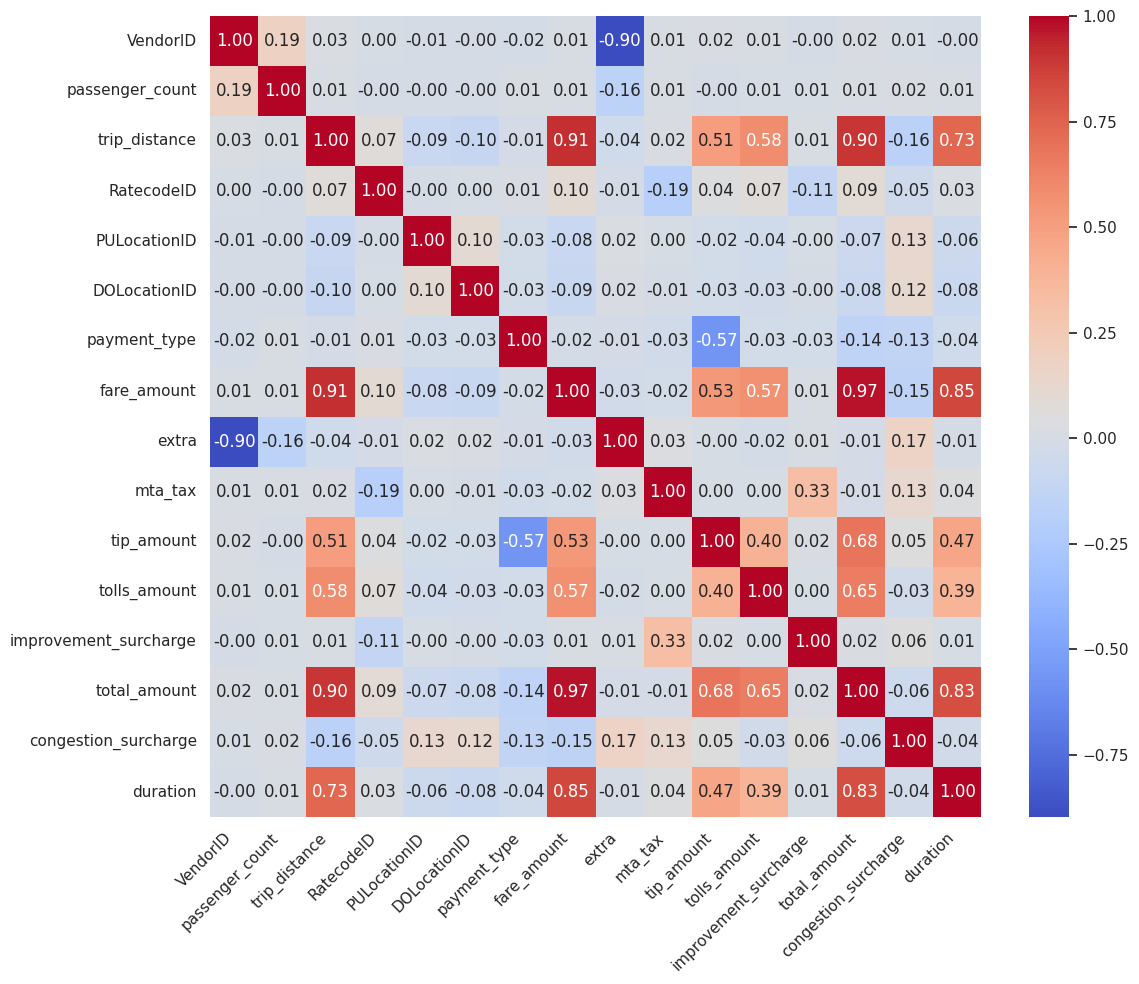

In [18]:
import matplotlib.pyplot as plt

heatmap = sns.heatmap(
    correlation,
    cmap="coolwarm",
    xticklabels=correlation.columns,
    yticklabels=correlation.columns,
    annot=True,
    fmt=".2f",
)
heatmap.figure.set_size_inches(12, 10)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

<Axes: ylabel='Count'>

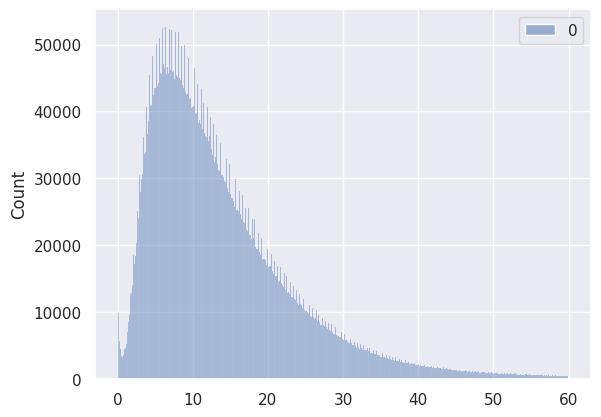

In [19]:
sns.histplot(lf_train.select("duration").collect(engine="streaming"))

<Axes: ylabel='Count'>

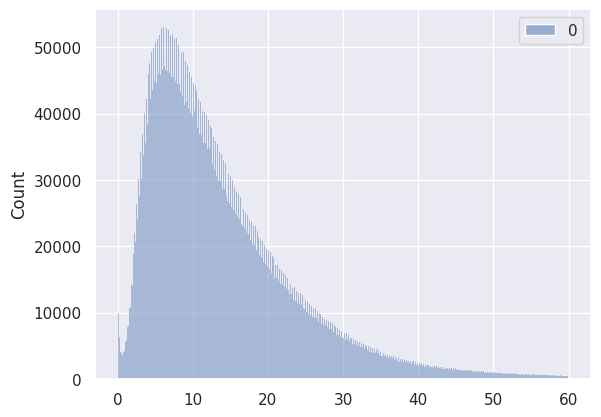

In [20]:
sns.histplot(lf_test.select("duration").collect(engine="streaming"))

## Hour of Day Analysis

In [21]:
# Extract hour of day from pickup datetime
lf_train_hour = lf_train.with_columns(
    pl.col("tpep_pickup_datetime").dt.hour().alias("pickup_hour")
)

# Calculate average duration by hour
hour_stats = (
    lf_train_hour.group_by("pickup_hour")
    .agg(
        [
            pl.col("duration").mean().alias("avg_duration"),
            pl.col("duration").count().alias("trip_count"),
            pl.col("duration").std().alias("std_duration"),
        ]
    )
    .sort("pickup_hour")
    .collect(engine="streaming")
)

hour_stats

pickup_hour,avg_duration,trip_count,std_duration
i8,f64,u32,f64
0,12.467618,196358,8.249065
1,11.449275,146183,7.398992
2,10.896031,97720,7.078253
3,10.942846,66444,7.348911
4,11.452128,49743,7.915229
…,…,…,…
19,13.769152,412551,9.206264
20,13.541676,374113,8.927859
21,13.379208,376677,8.602059


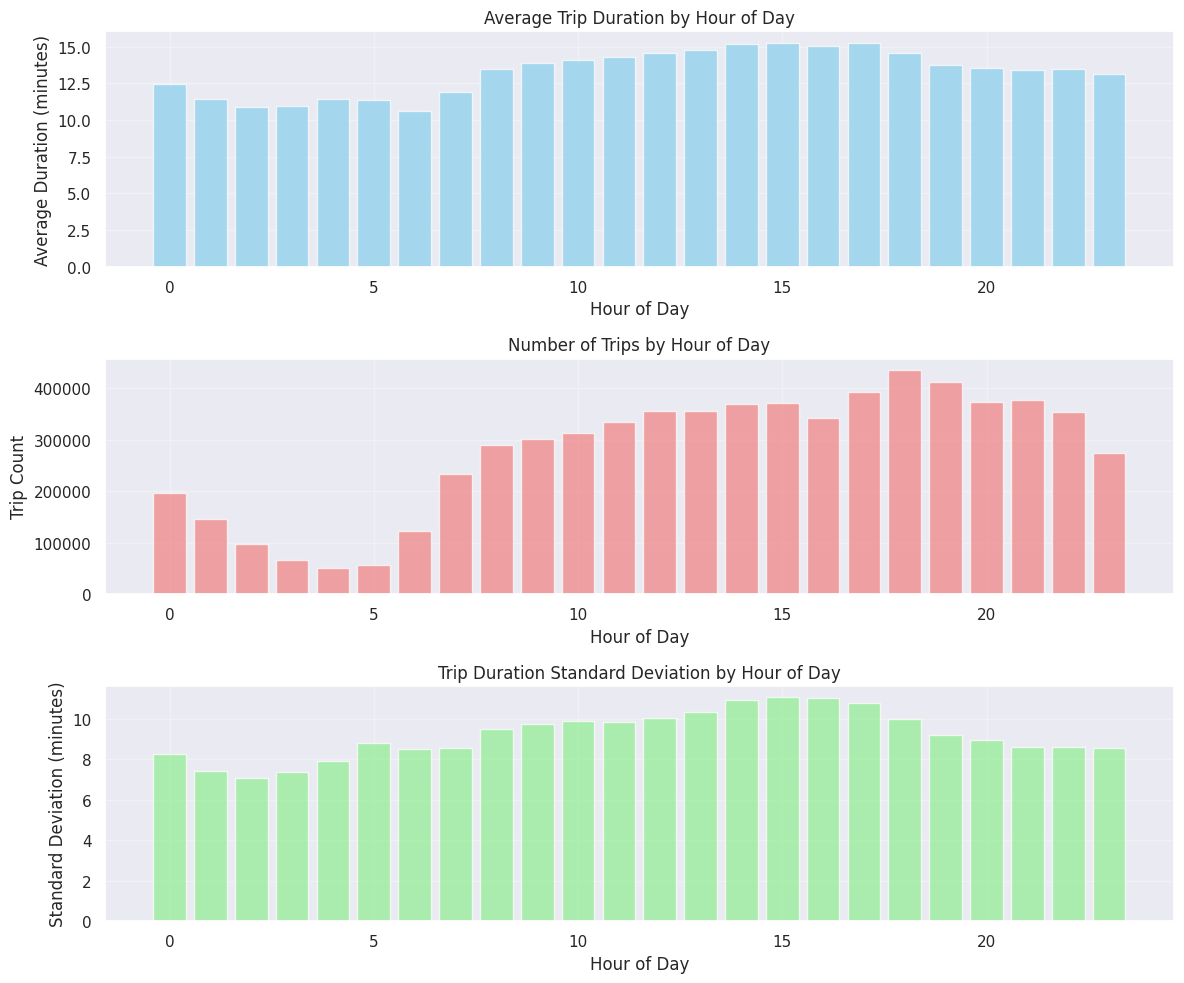

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Average duration by hour
ax1.bar(
    hour_stats["pickup_hour"], hour_stats["avg_duration"], alpha=0.7, color="skyblue"
)
ax1.set_title("Average Trip Duration by Hour of Day")
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Average Duration (minutes)")
ax1.grid(True, alpha=0.3)

# Trip count by hour
ax2.bar(
    hour_stats["pickup_hour"], hour_stats["trip_count"], alpha=0.7, color="lightcoral"
)
ax2.set_title("Number of Trips by Hour of Day")
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Trip Count")
ax2.grid(True, alpha=0.3)

# Duration variability by hour
ax3.bar(
    hour_stats["pickup_hour"], hour_stats["std_duration"], alpha=0.7, color="lightgreen"
)
ax3.set_title("Trip Duration Standard Deviation by Hour of Day")
ax3.set_xlabel("Hour of Day")
ax3.set_ylabel("Standard Deviation (minutes)")
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
# Create categorical hour groups for analysis
lf_train_hour = lf_train_hour.with_columns(
    pl.when(pl.col("pickup_hour").is_in([0, 1, 2, 3, 4, 5]))
    .then(pl.lit("Late Night (0-5)"))
    .when(pl.col("pickup_hour").is_in([6, 7, 8, 9]))
    .then(pl.lit("Morning Rush (6-9)"))
    .when(pl.col("pickup_hour").is_in([10, 11, 12, 13, 14, 15]))
    .then(pl.lit("Midday (10-15)"))
    .when(pl.col("pickup_hour").is_in([16, 17, 18, 19]))
    .then(pl.lit("Evening Rush (16-19)"))
    .otherwise(pl.lit("Evening (20-23)"))
    .alias("time_period")
)

# Analyze by time periods
period_stats = (
    lf_train_hour.group_by("time_period")
    .agg(
        [
            pl.col("duration").mean().alias("avg_duration"),
            pl.col("duration").count().alias("trip_count"),
            pl.col("duration").std().alias("std_duration"),
            pl.col("duration").median().alias("median_duration"),
        ]
    )
    .sort("avg_duration", descending=True)
    .collect(engine="streaming")
)

period_stats

time_period,avg_duration,trip_count,std_duration,median_duration
str,f64,u32,f64,f64
"""Midday (10-15)""",14.733427,2099740,10.378318,12.066667
"""Evening Rush (16-19)""",14.632774,1581596,10.245846,12.033333
"""Evening (20-23)""",13.39219,1377862,8.688063,11.333333
"""Morning Rush (6-9)""",12.853382,947744,9.298165,10.383333
"""Late Night (0-5)""",11.622551,612486,7.830041,9.733333


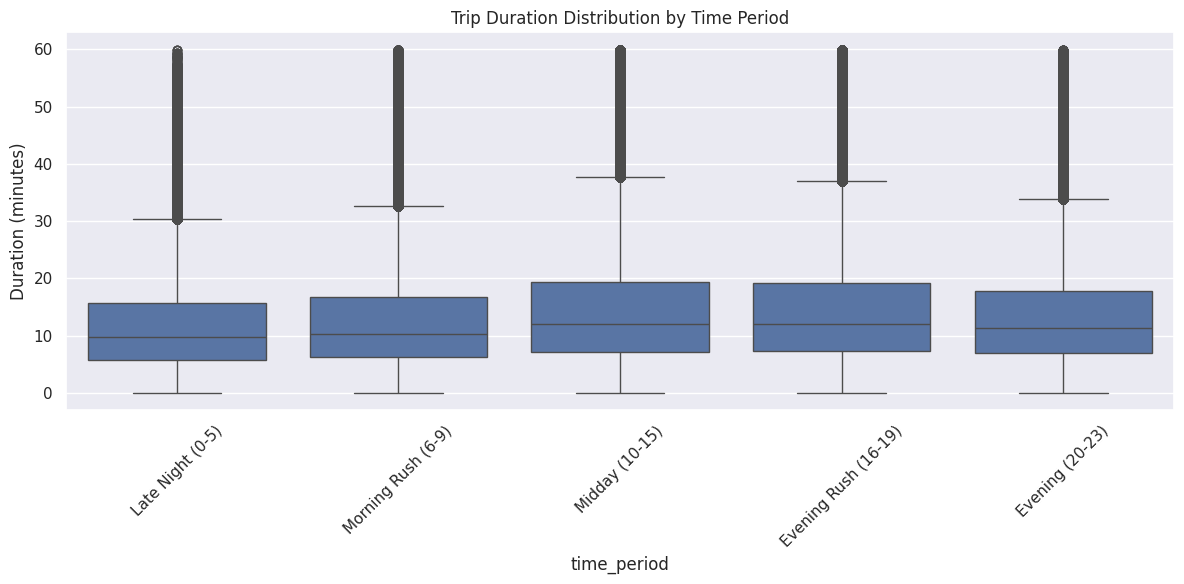

In [24]:
# Box plot showing duration distribution by time period
plt.figure(figsize=(12, 6))
period_data = lf_train_hour.select(["duration", "time_period"]).collect(
    engine="streaming"
)
sns.boxplot(data=period_data, x="time_period", y="duration")
plt.title("Trip Duration Distribution by Time Period")
plt.xticks(rotation=45)
plt.ylabel("Duration (minutes)")
plt.tight_layout()
plt.show()

## Geographic Analysis

In [25]:
# Analyze pickup locations
pickup_stats = (
    lf_train.group_by("PULocationID")
    .agg(
        [
            pl.col("duration").mean().alias("avg_duration"),
            pl.col("duration").count().alias("trip_count"),
            pl.col("duration").std().alias("std_duration"),
            pl.col("trip_distance").mean().alias("avg_distance"),
        ]
    )
    .sort("trip_count", descending=True)
    .collect(engine="streaming")
)

print(f"Number of unique pickup locations: {pickup_stats.height}")
print("Top 10 pickup locations by trip count:")
pickup_stats.head(10)

Number of unique pickup locations: 259
Top 10 pickup locations by trip count:


PULocationID,avg_duration,trip_count,std_duration,avg_distance
i64,f64,u32,f64,f64
237,11.194845,317577,7.788539,1.651439
161,14.706663,284649,8.768376,2.169912
236,11.302085,281587,8.126375,1.794258
186,16.170776,242051,9.520724,2.171337
230,14.782405,236136,9.64936,2.493093
162,13.574306,234776,8.428033,2.188898
142,12.304664,214003,8.121858,2.033077
48,12.913094,208723,8.871175,2.262101
234,13.657796,197125,8.558365,1.977332


In [26]:
# Analyze dropoff locations
dropoff_stats = (
    lf_train.group_by("DOLocationID")
    .agg(
        [
            pl.col("duration").mean().alias("avg_duration"),
            pl.col("duration").count().alias("trip_count"),
            pl.col("duration").std().alias("std_duration"),
            pl.col("trip_distance").mean().alias("avg_distance"),
        ]
    )
    .sort("trip_count", descending=True)
    .collect(engine="streaming")
)

print("Top 10 dropoff locations by trip count:")
dropoff_stats.head(10)

Top 10 dropoff locations by trip count:


DOLocationID,avg_duration,trip_count,std_duration,avg_distance
i64,f64,u32,f64,f64
236,10.923654,295421,7.894616,1.734914
237,11.270238,286379,7.814383,1.533022
161,13.971509,261327,9.036304,1.914155
230,15.311196,205556,10.72866,2.280085
170,12.731925,202621,8.414099,1.925474
162,13.597522,201126,8.990106,2.086849
142,11.714485,190997,7.867661,1.782739
48,13.421287,181127,9.397558,2.02848
239,11.397162,177861,8.146648,1.915113


In [27]:
# Analyze pickup-dropoff pairs (origin-destination analysis)
od_stats = (
    lf_train.group_by(["PULocationID", "DOLocationID"])
    .agg(
        [
            pl.col("duration").mean().alias("avg_duration"),
            pl.col("duration").count().alias("trip_count"),
            pl.col("trip_distance").mean().alias("avg_distance"),
        ]
    )
    .filter(pl.col("trip_count") >= 100)
    .sort("trip_count", descending=True)
    .collect(engine="streaming")
)

print("Top 10 origin-destination pairs (min 100 trips):")
od_stats.head(10)

Top 10 origin-destination pairs (min 100 trips):


PULocationID,DOLocationID,avg_duration,trip_count,avg_distance
i64,i64,f64,u32,f64
237,236,7.129469,49102,1.061131
236,237,8.406114,41852,1.061234
236,236,4.657119,39630,0.621722
237,237,5.560932,39058,0.645768
264,264,11.763182,28404,2.153422
239,238,5.04987,20324,0.841627
239,142,6.069157,19753,0.8769
161,237,11.302446,19019,1.102565
237,161,10.88381,18961,1.091119


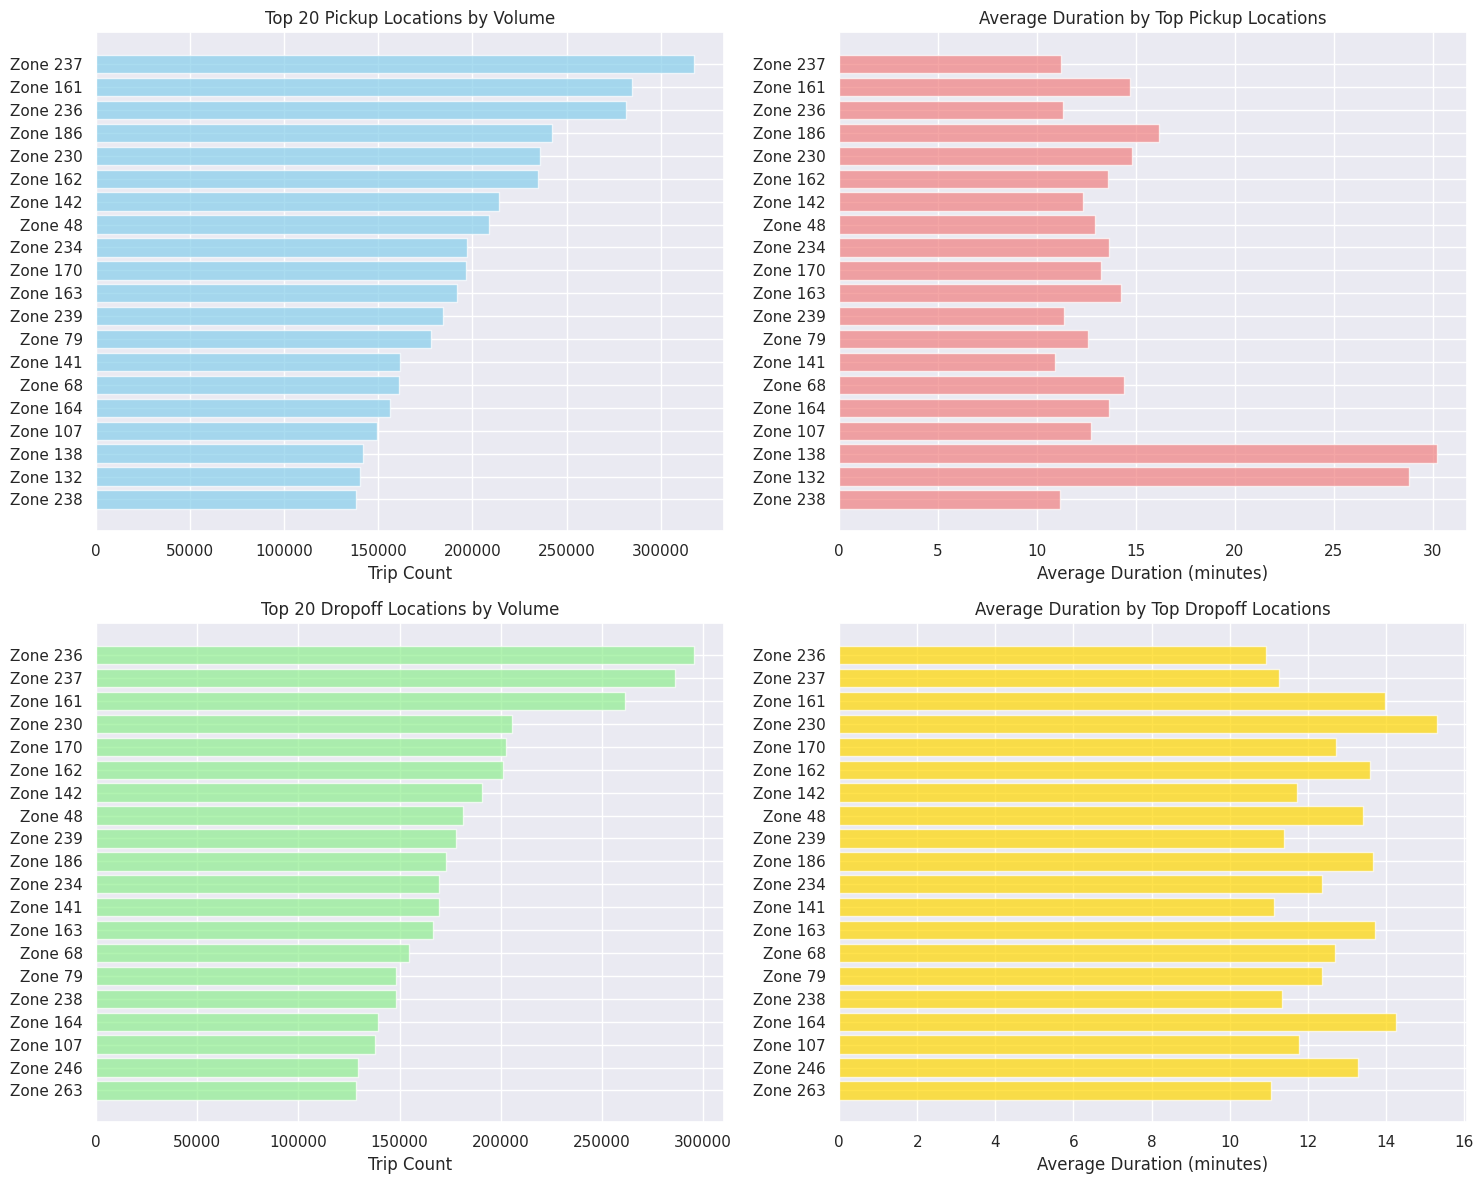

In [28]:
# Visualize top pickup locations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Top pickup locations by volume
top_pickup = pickup_stats.head(20)
ax1.barh(range(len(top_pickup)), top_pickup["trip_count"], alpha=0.7, color="skyblue")
ax1.set_yticks(range(len(top_pickup)))
ax1.set_yticklabels([f"Zone {id}" for id in top_pickup["PULocationID"]])
ax1.set_xlabel("Trip Count")
ax1.set_title("Top 20 Pickup Locations by Volume")
ax1.invert_yaxis()

# Average duration by top pickup locations
ax2.barh(
    range(len(top_pickup)), top_pickup["avg_duration"], alpha=0.7, color="lightcoral"
)
ax2.set_yticks(range(len(top_pickup)))
ax2.set_yticklabels([f"Zone {id}" for id in top_pickup["PULocationID"]])
ax2.set_xlabel("Average Duration (minutes)")
ax2.set_title("Average Duration by Top Pickup Locations")
ax2.invert_yaxis()

# Top dropoff locations by volume
top_dropoff = dropoff_stats.head(20)
ax3.barh(
    range(len(top_dropoff)), top_dropoff["trip_count"], alpha=0.7, color="lightgreen"
)
ax3.set_yticks(range(len(top_dropoff)))
ax3.set_yticklabels([f"Zone {id}" for id in top_dropoff["DOLocationID"]])
ax3.set_xlabel("Trip Count")
ax3.set_title("Top 20 Dropoff Locations by Volume")
ax3.invert_yaxis()

# Average duration by top dropoff locations
ax4.barh(range(len(top_dropoff)), top_dropoff["avg_duration"], alpha=0.7, color="gold")
ax4.set_yticks(range(len(top_dropoff)))
ax4.set_yticklabels([f"Zone {id}" for id in top_dropoff["DOLocationID"]])
ax4.set_xlabel("Average Duration (minutes)")
ax4.set_title("Average Duration by Top Dropoff Locations")
ax4.invert_yaxis()

plt.tight_layout()
plt.show()

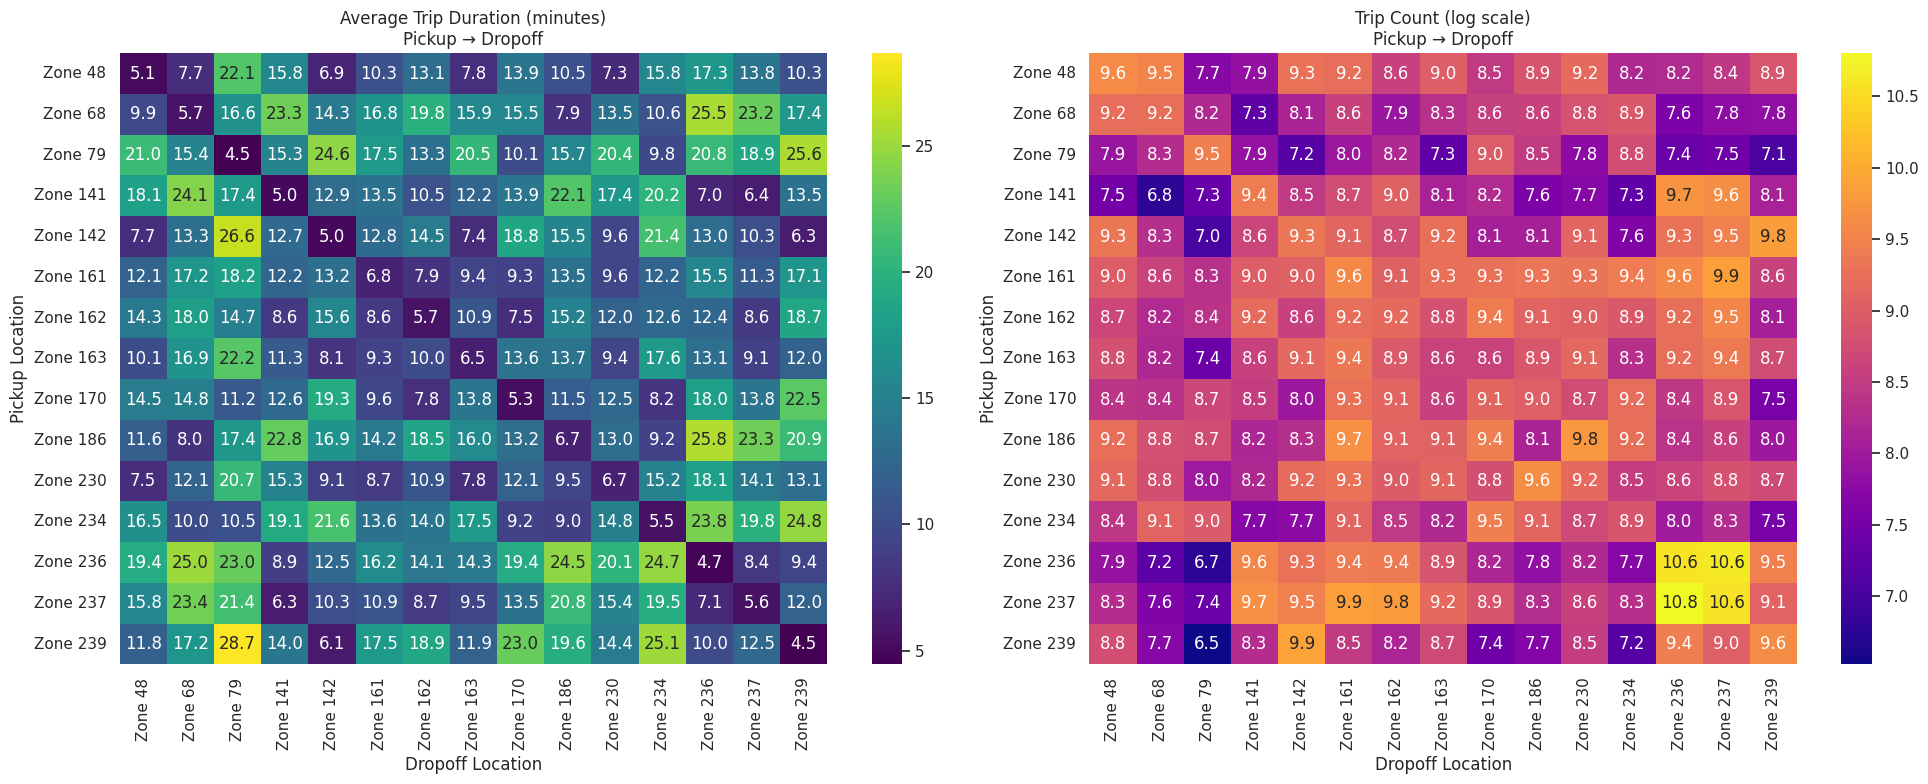

In [29]:
# Create a heatmap of origin-destination pairs
import numpy as np

# Get top locations for heatmap
top_locations = list(
    set(
        pickup_stats.head(15)["PULocationID"].to_list()
        + dropoff_stats.head(15)["DOLocationID"].to_list()
    )
)

# Create OD matrix
od_matrix_data = (
    lf_train.filter(
        pl.col("PULocationID").is_in(top_locations)
        & pl.col("DOLocationID").is_in(top_locations)
    )
    .group_by(["PULocationID", "DOLocationID"])
    .agg(
        [
            pl.col("duration").mean().alias("avg_duration"),
            pl.col("duration").count().alias("trip_count"),
        ]
    )
    .collect(engine="streaming")
)

# Create matrix for visualization
location_ids = sorted(top_locations)
duration_matrix = np.zeros((len(location_ids), len(location_ids)))
count_matrix = np.zeros((len(location_ids), len(location_ids)))

for row in od_matrix_data.iter_rows():
    pu_idx = location_ids.index(row[0])
    do_idx = location_ids.index(row[1])
    duration_matrix[pu_idx, do_idx] = row[2]
    count_matrix[pu_idx, do_idx] = row[3]

# Plot heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Average duration heatmap
sns.heatmap(
    duration_matrix,
    xticklabels=[f"Zone {id}" for id in location_ids],
    yticklabels=[f"Zone {id}" for id in location_ids],
    annot=True,
    fmt=".1f",
    cmap="viridis",
    ax=ax1,
)
ax1.set_title("Average Trip Duration (minutes)\nPickup → Dropoff")
ax1.set_xlabel("Dropoff Location")
ax1.set_ylabel("Pickup Location")

# Trip count heatmap (log scale for better visualization)
count_matrix_log = np.log1p(count_matrix)
sns.heatmap(
    count_matrix_log,
    xticklabels=[f"Zone {id}" for id in location_ids],
    yticklabels=[f"Zone {id}" for id in location_ids],
    annot=True,
    fmt=".1f",
    cmap="plasma",
    ax=ax2,
)
ax2.set_title("Trip Count (log scale)\nPickup → Dropoff")
ax2.set_xlabel("Dropoff Location")
ax2.set_ylabel("Pickup Location")

plt.tight_layout()
plt.show()

In [30]:
# Create hour-of-day feature and pickup-dropoff pair encoding in one step
lf_train = lf_train.with_columns(
    [
        pl.col("tpep_pickup_datetime").dt.hour().alias("pickup_hour"),
        (
            pl.col("PULocationID").cast(pl.Utf8)
            + "-"
            + pl.col("DOLocationID").cast(pl.Utf8)
        )
        .cast(pl.Categorical)
        .alias("pickup_dropoff_pair"),
    ]
)
lf_test = lf_test.with_columns(
    [
        pl.col("tpep_pickup_datetime")
        .dt.hour()
        .cast(pl.Utf8)
        .cast(pl.Categorical)
        .alias("pickup_hour"),
        (
            pl.col("PULocationID").cast(pl.Utf8)
            + "-"
            + pl.col("DOLocationID").cast(pl.Utf8)
        )
        .cast(pl.Categorical)
        .alias("pickup_dropoff_pair"),
    ]
)

In [31]:
engineered_lf_correlation = (
    lf_train.select([pl.col("pickup_hour"), pl.col("duration")])
    .collect(engine="streaming")
    .corr()
)

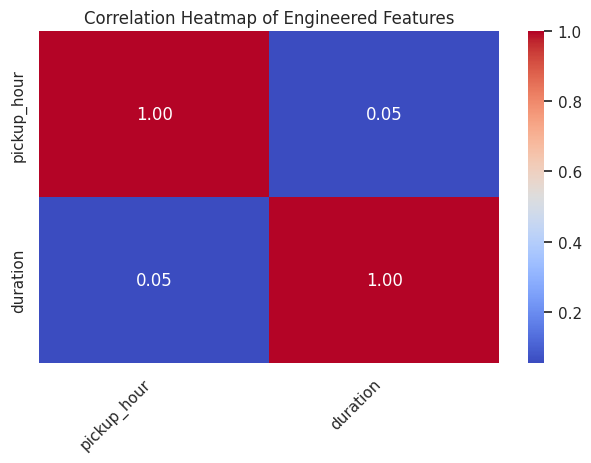

In [32]:
sns.heatmap(
    engineered_lf_correlation,
    cmap="coolwarm",
    xticklabels=engineered_lf_correlation.columns,
    yticklabels=engineered_lf_correlation.columns,
    annot=True,
    fmt=".2f",
)
plt.title("Correlation Heatmap of Engineered Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

In [33]:
# If nvidia requirements are installed open notebook in
try:
    %load_ext cuml.accel
except ImportError:
    print("cuml not available, running without GPU acceleration")
except Exception as e:
    print(f"Error loading cuml: {e}")

cuml not available, running without GPU acceleration


In [34]:
lf_train.select(pl.col("trip_distance")).head().collect(engine="streaming")

trip_distance
f64
1.5
4.5
2.83
0.65
1.81


## Baseline Model Pipeline

In [35]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# features known at beginning of trip
baseline_features = [
    "trip_distance",
    "pickup_dropoff_pair",
]

target = "duration"

dv = DictVectorizer()

X_train_dicts = (
    lf_train.select(baseline_features).collect(engine="streaming").to_dicts()
)
X_train = dv.fit_transform(X_train_dicts)
X_test_dicts = lf_test.select(baseline_features).collect(engine="streaming").to_dicts()
X_test = dv.transform(X_test_dicts)

y_train = lf_train.select(target).collect(engine="streaming").to_numpy().flatten()
y_test = lf_test.select(target).collect(engine="streaming").to_numpy().flatten()


print(f"Baseline features ({len(baseline_features)}): {baseline_features}")
print(f"Training data: {X_train.shape}")
print(f"Test data: {X_test.shape}")

Baseline features (2): ['trip_distance', 'pickup_dropoff_pair']
Training data: (6619428, 25298)
Test data: (6615014, 25298)


In [36]:
# Baseline LR model
from sklearn.metrics import root_mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2: {r2:.2f}")
print(f"RMSE: {rmse:.2f} minutes")

R2: 0.06
RMSE: 9.56 minutes


In [37]:
# Scale features and train model
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train baseline model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate model
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("BASELINE MODEL RESULTS")
print("=" * 30)
print(f"Train MAE: {train_mae:.3f}")
print(f"Test MAE:  {test_mae:.3f}")
print(f"Train RMSE: {train_rmse:.3f}")
print(f"Test RMSE:  {test_rmse:.3f}")
print(f"Train R²: {train_r2:.3f}")
print(f"Test R²:  {test_r2:.3f}")

BASELINE MODEL RESULTS
Train MAE: 6.990
Test MAE:  7.172
Train RMSE: 9.337
Test RMSE:  9.560
Train R²: 0.073
Test R²:  0.061
